

**Background:**

TechCorp Inc. has been growing rapidly and, as a result, is experiencing challenges in managing employee performance and productivity. The management team needs insights into employee behavior, department-wise performance, and overall trends to make better decisions on training, resource allocation, and recruitment. This analysis should be devoid of bias.

**Dataset:**

TechCorp has shared an anonymized employee dataset containing various attributes related to their employees performance and demographics. The dataset has 1,000 rows and 13 columns, representing key factors like department, job role, satisfaction score, monthly hours, and project completion status.
Sample Dataset Columns:

*   Employee ID
*   Department (e.g.,Sales,IT,HR)
*   Job Role (e.g., Data Analyst, Developer, Sales Executive)
*   Age
*   Gender
*   Monthly Hours
*   Satisfaction Score (Scale of 1-10)
*   Projects Completed
*   Training Hours (Hours of training received)
*   Tenure (Years with the company)
*   Salary Level (Low, Medium, High)
*   Promotions (Number of promotions)
*   Absenteeism Days (Number of days absent in a year)



**Tasks**

To provide valuable insights for management. I followed these steps for the analysis:

**Data Import and Initial Exploration**
 - I loaded the dataset and displayed the first few rows to understand its structure.  
 - I summarized the data types and identified columns with missing values

**Cleaning**
 - I handled missing values based on sound reasoning (e.g., using the mean for  numeric columns or a mode for categorical ones), dropping missing rows that could skew report.
 - I checked obvious outliers that could skew analysis (e.g., unusually high monthly  hours).
 - I ensured categorical variables are correctly represented (e.g., 'Department' or 'Job  Role').

**Feature Engineering**
 - I created a new column, 'Overworked', which flags employees with monthly hours  above 220 as 'Yes' and others as 'No'.
 - I generated an 'Efficiency Score' by calculating the ratio of 'Projects Completed' to  'Monthly Hours'.

**Exploratory Data Analysis (EDA)**
 - I provided a summary of employee distribution across departments and job roles.  
 - I visualized the average satisfaction score by department to help understand which  departments might need attention.
 - I compared the 'Efficiency Score' across different job roles to find which roles have the  highest efficiency.

**Conclusions and Recommendations**
 - Based on the analysis, I provided insights and actionable recommendations for  TechCorp.
 - I suggested two potential strategies for improving employee satisfaction and reducing  overwork.











# Data Import and Initial Exploration

In [1]:
import pandas as pd
from google.colab import files
uplodaded = files.upload()  #To import the data and Pandas package

Saving TechCorp_Employee_Data.csv to TechCorp_Employee_Data.csv


In [2]:
data = pd.read_csv("TechCorp_Employee_Data.csv")  #Load the dataset and house in a variable named "data"

In [3]:
data.head(10)  #To view the first ten(10) rows

,Employee ID,Department,Job Role,Age,Gender,Monthly Hours,Satisfaction Score,Projects Completed,Training Hours,Tenure,Salary Level,Promotions,Absenteeism Days
0,1,IT,Sales Executive,35,Female,196.0,8.0,19.0,62,11,Low,2,17
1,2,HR,Accountant,30,Male,141.0,10.0,15.0,78,1,Low,2,2
2,3,IT,Operations Manager,45,Male,195.0,4.0,18.0,52,6,Low,2,12
3,4,Marketing,Operations Manager,56,Male,227.0,10.0,1.0,41,6,High,3,7
4,5,Marketing,Developer,45,Female,217.0,3.0,9.0,74,19,Low,4,9
5,6,Operations,Operations Manager,41,Male,164.0,4.0,NaN,32,5,High,4,2
6,7,Marketing,Data Analyst,44,Female,231.0,7.0,11.0,64,2,Medium,4,13
7,8,Marketing,Sales Executive,50,Female,227.0,2.0,4.0,99,18,Medium,4,18
8,9,HR,Marketing Specialist,47,Female,242.0,3.0,12.0,14,1,High,4,14
9,10,Finance,Developer,22,Female,235.0,8.0,11.0,16,7,Medium,0,11


In [4]:
data.info()  #Summarizing the data types and do a eyeball check for null columns with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee ID         1000 non-null   int64  
 1   Department          1000 non-null   object 
 2   Job Role            1000 non-null   object 
 3   Age                 1000 non-null   int64  
 4   Gender              1000 non-null   object 
 5   Monthly Hours       970 non-null    float64
 6   Satisfaction Score  950 non-null    float64
 7   Projects Completed  980 non-null    float64
 8   Training Hours      1000 non-null   int64  
 9   Tenure              1000 non-null   int64  
 10  Salary Level        960 non-null    object 
 11  Promotions          1000 non-null   int64  
 12  Absenteeism Days    1000 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 101.7+ KB


In [5]:
data.isnull().sum() #To check for missing values

,0
Employee ID,0
Department,0
Job Role,0
Age,0
Gender,0
Monthly Hours,30
Satisfaction Score,50
Projects Completed,20
Training Hours,0
Tenure,0


**Note:**: Based on the data import and initial exploration, there are missing values in columns such as Monthly_Hours, Satisfaction_Score, Projects_Completed, and Salary_Level. While most columns have appropriate data types, the Projects_Completed column will be converted from float to integer, as it represents an absolute count.

# Data Cleaning

Handle missing values based on sound reasoning (e.g., using the mean for numeric columns and mode value for categorical ones

In [6]:
data.describe()  #To view the summary statistics of numerical columns

,Employee ID,Age,Monthly Hours,Satisfaction Score,Projects Completed,Training Hours,Tenure,Promotions,Absenteeism Days
count,1000.000000,1000.000000,970.000000,950.000000,980.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.918000,194.753608,5.577895,9.837755,48.934000,9.819000,2.037000,9.626000
std,288.819436,11.030092,31.254475,2.872370,5.487771,28.855576,5.435419,1.421848,5.789788
min,1.000000,21.000000,140.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,250.750000,30.000000,168.250000,3.000000,5.000000,24.000000,5.000000,1.000000,4.000000
50%,500.500000,40.000000,196.000000,6.000000,9.000000,49.000000,10.000000,2.000000,10.000000
75%,750.250000,49.000000,221.000000,8.000000,15.000000,74.000000,15.000000,3.000000,15.000000
max,1000.000000,59.000000,249.000000,10.000000,19.000000,99.000000,19.000000,4.000000,19.000000


In handling missing values in Monthly Hours column, I filled the null rows with the mean of Monthly Hours. This is because the mean of Monthly Hours is around 194.75, and the standard deviation is 31.25. This relatively low Standard Deviation compared to the mean suggests that the Monthly Hours values are somewhat consistent , clustering around the mean without extreme variation.

In [7]:
#Filling missing values in Monthly Hours using the mean
data["Monthly Hours"] = data["Monthly Hours"].fillna(data["Monthly Hours"].mean())

For Satisfaction Score, out of 1000 entries, 50 are missing, which is 5% of the data. The mean Satisfaction Score is about 5.6, with a high standard deviation of 2.87. This implies that the Satisfaction Scores range widely and based on this, I will be dropping the missing values.

In [8]:
#Dropping the missing values in Satisfaction Score
data = data.dropna(subset=["Satisfaction Score"])

Looking at the missing values in Project Completed , although they are a small part of the data (2%), this field is critical because it directly measures each employee's productivity. Filling in these gaps would mean making assumptions about how many projects each employee completed, which could reduce the accuracy of my analysis. To keep the data as reliable as possible, I decided to remove these rows instead of filling in values. This ensures that the analysis reflects actual performances without introducing estimated values that could skew the results.

In [9]:
#Dropping the missing vales in Project Completed
data = data.dropna(subset=["Projects Completed"])

In [10]:
#Coverting Projects Completed column from a float data type to integer
data["Projects Completed"] = data["Projects Completed"].astype(int)

For salary level, let us see the distribution of the categories

In [11]:
data["Salary Level"].value_counts()

,count
Salary Level,
Medium,300
Low,297
High,297


Even though the missing values in the Salary Level column make up only a small part (4%) of the data, I decided to drop these rows to keep the analysis accurate and reliable. Since Salary Level is an important factor in understanding employee pay and performance, filling in the missing values could lead to assumptions that might affect the results. By removing these rows, l ensured that my analysis is based on complete data, which is essential for making informed decisions.

In [12]:
#Dropping the missing values in Salary Level
data = data.dropna(subset=["Salary Level"])

Remove any obvious outliers that could skew analysis (e.g., unusually high monthly hours).

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns  #Import necessary libraries for data visualisation

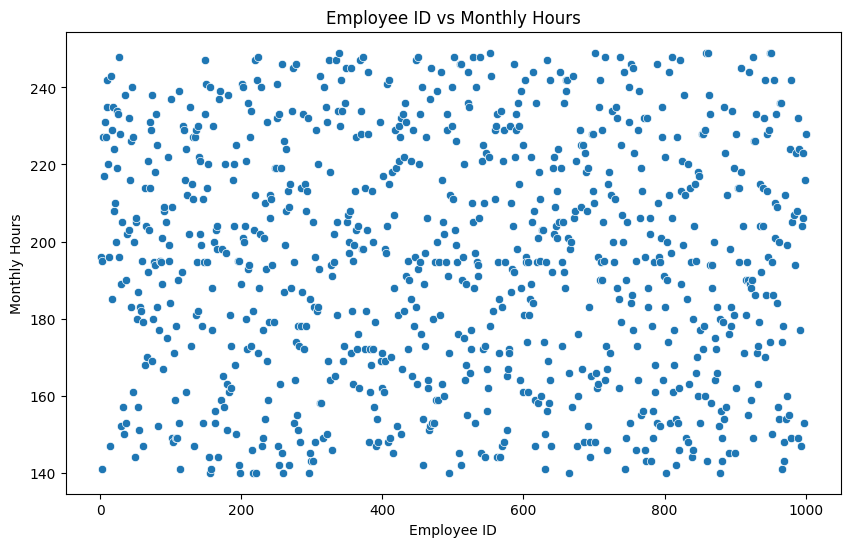

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Employee ID", y="Monthly Hours", data=data)
plt.title("Employee ID vs Monthly Hours")
plt.xlabel("Employee ID")
plt.ylabel("Monthly Hours")
plt.show()

Upon reviewing the statistical breakdown and the scatterplot, I found that all the values are within a similar range. The maximum value of 249 is close to the average of 195, and the minimum value is 140 is also near to the average. Therefore, I conclude that there are no outliers in the data. This shows that the dataset is stable and ready for further analysis.

In [15]:
data.isnull().sum() #To ensure that data cleaning is done and there are no missing values

,0
Employee ID,0
Department,0
Job Role,0
Age,0
Gender,0
Monthly Hours,0
Satisfaction Score,0
Projects Completed,0
Training Hours,0
Tenure,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee ID         894 non-null    int64  
 1   Department          894 non-null    object 
 2   Job Role            894 non-null    object 
 3   Age                 894 non-null    int64  
 4   Gender              894 non-null    object 
 5   Monthly Hours       894 non-null    float64
 6   Satisfaction Score  894 non-null    float64
 7   Projects Completed  894 non-null    int64  
 8   Training Hours      894 non-null    int64  
 9   Tenure              894 non-null    int64  
 10  Salary Level        894 non-null    object 
 11  Promotions          894 non-null    int64  
 12  Absenteeism Days    894 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 97.8+ KB


 Dropping missing values have reduced the rows in the dataset from 1000 to 894. Dropping the rows was necessary as the client requested that the analysis should be devoid of bias.

# Feature Engineering


*   Create a new column, *Overworked*, which flags employees with monthly hours above 220 as Yes and other as No.
*   Generate Efficiency Score by calculating the ratio of Projects Completed to Monthly Hours



In [17]:
def overworked_status(monthly_hours): #Created a function called Overworked_status
  if monthly_hours > 220:
    return "Yes"
  else:
    return "No"

In [18]:
#Applied the created function on the monthly hours, stored in the variable "Overworked"
data["Overworked"] = data["Monthly Hours"].apply(overworked_status)

In [19]:
#Introduced the "round" function to convert my output to two decimal points
data["Efficiency Score"] = round(data["Projects Completed"] / data["Monthly Hours"],2) *100

In [20]:
data.head()

,Employee ID,Department,Job Role,Age,Gender,Monthly Hours,Satisfaction Score,Projects Completed,Training Hours,Tenure,Salary Level,Promotions,Absenteeism Days,Overworked,Efficiency Score
0,1,IT,Sales Executive,35,Female,196.0,8.0,19,62,11,Low,2,17,No,10.0
1,2,HR,Accountant,30,Male,141.0,10.0,15,78,1,Low,2,2,No,11.0
2,3,IT,Operations Manager,45,Male,195.0,4.0,18,52,6,Low,2,12,No,9.0
3,4,Marketing,Operations Manager,56,Male,227.0,10.0,1,41,6,High,3,7,Yes,0.0
4,5,Marketing,Developer,45,Female,217.0,3.0,9,74,19,Low,4,9,No,4.0


# Exploratory Data Analysis (EDA)

Provide a summary of employee distribution across Department and Job Roles

In [21]:
data["Department"].value_counts() #Employee Distribution by Department

,count
Department,
Finance,162
HR,157
Sales,155
Operations,155
IT,146
Marketing,119


In [22]:
data["Job Role"].value_counts() #Employee Distribution by Job Role

,count
Job Role,
Data Analyst,166
Marketing Specialist,159
Accountant,158
Operations Manager,147
Sales Executive,139
Developer,125




*   Visualize the average satisfaction score by department to help understand which deparments might need attention



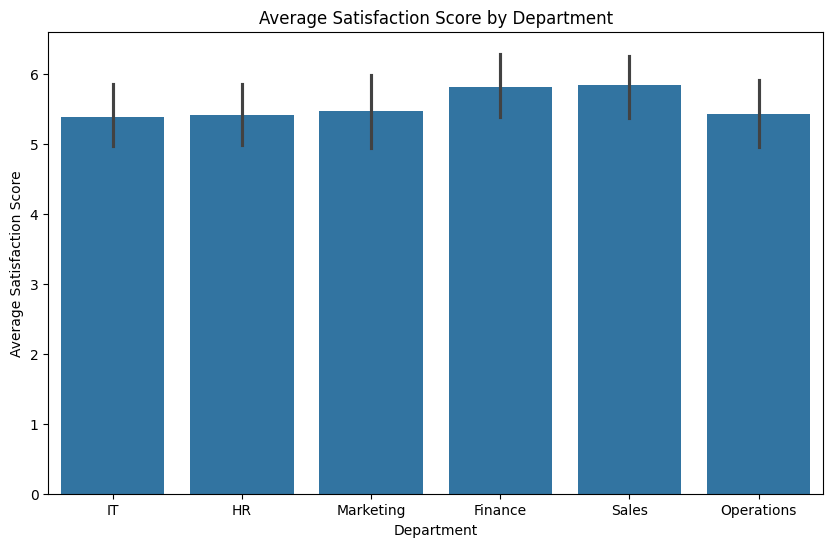

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x="Department", y="Satisfaction Score", data=data)
plt.title("Average Satisfaction Score by Department")
plt.xlabel("Department")
plt.ylabel("Average Satisfaction Score")
plt.show()

This chart provides insights into employee satisfaction across various departments, offering guidance for managerial decisions to improve employee morale and engagement.
Key observations include:

* **High Satisfaction in Sales and Finance:** These departments have the highest
average satisfaction scores, close to 6, indicating favorable work conditions, positive management, or adequate resources that contribute to employee satisfaction.
* **High Satisfaction in Sales and Finance:** These departments have the highest
average satisfaction scores, close to 6, indicating favorable work conditions, positive management, or adequate resources that contribute to employee satisfaction.
* **Moderate Satisfaction in IT, HR, Marketing, and Operations:** Departments like IT, HR, Marketing, and Operations show slightly lower satisfaction averages, around 5.5, with Marketing and Operations scoring the lowest, This suggests that these departments could benefit from targeted Initiatives, such as improving workload balance, team dynamics, or resource allocation.



*   Compare the Efficiency Score across different job roles to find which roles have the highest efficiency



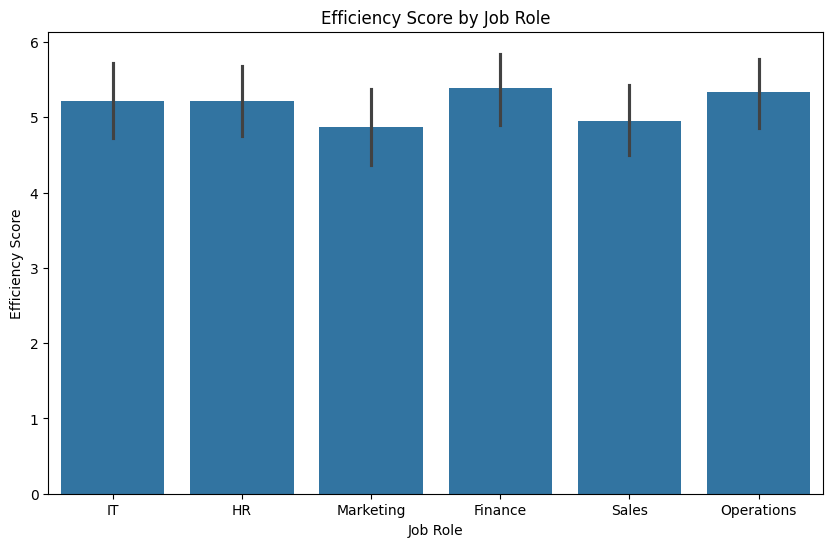

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x="Department", y="Efficiency Score", data=data)
plt.title("Efficiency Score by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Efficiency Score")
plt.xticks(rotation=0)
plt.show()

This chart shows the average efficiency scores across various job roles within the company. The efficiency score is calculated as the ratio of projects completed to monthly hours worked, providing a measure of productivity.

**Observations:** The Operations and Finance roles have the highest average efficiency scores, suggesting that employees in these roles are completing projects with relatively fewer hours. The IT and HR roles have slightly lower efficiency scores than Operations and Finance but are close to the top. Marketing and Sales role on the other hand have the lowest efficiency scores among the departments; this suggest that employees in Marketing and Sales may require more time to complete projects.

# Visualization


*   Create a bar chart for Overworked employees by Department

Since the overworked column contains categorical data: "Yes" and "No", I need to count the number of "Yes" per Department, store the ouput in a variable, then proceed to create the bar chart.



In [25]:
Overworked_counts = data[data["Overworked"] == "Yes"].groupby("Department").size().reset_index(name="Overworked_counts")
#Counts the number of overworked employees for each department and I used the reset_index function to put the table in a dataframe.

In [26]:
Overworked_counts #Shows overworked employees by Department

,Department,Overworked_counts
0,Finance,36
1,HR,36
2,IT,34
3,Marketing,40
4,Operations,40
5,Sales,47


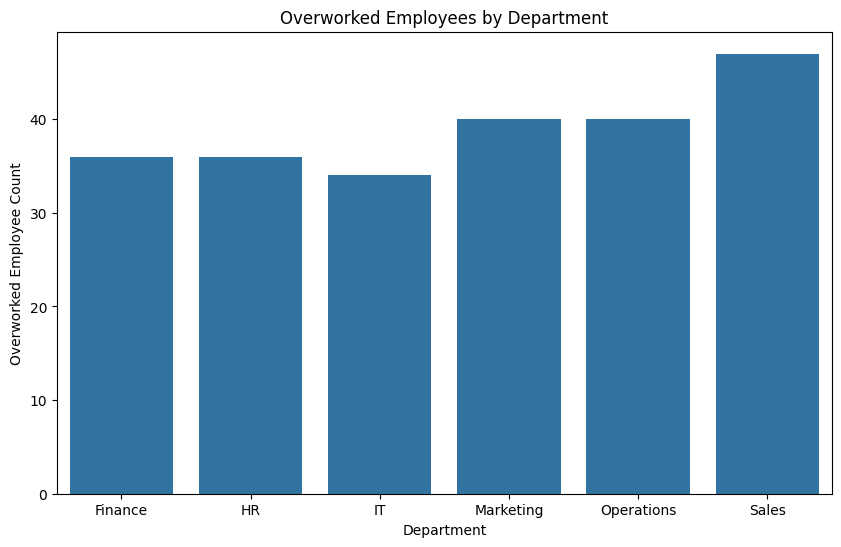

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x="Department", y="Overworked_counts", data=Overworked_counts)
plt.title("Overworked Employees by Department")
plt.xlabel("Department")
plt.ylabel("Overworked Employee Count")
plt.show()

The Sales department has the highest number of overworked employees, while the IT department has the fewest. Other departments, like Finance, HR, Marketing, and Operations have similar counts close to 40. This analysis suggests that certain departments, especially Sales, may require attention to address workload or staffing levels.


*   Plot a histogram of employee Efficeincy Score




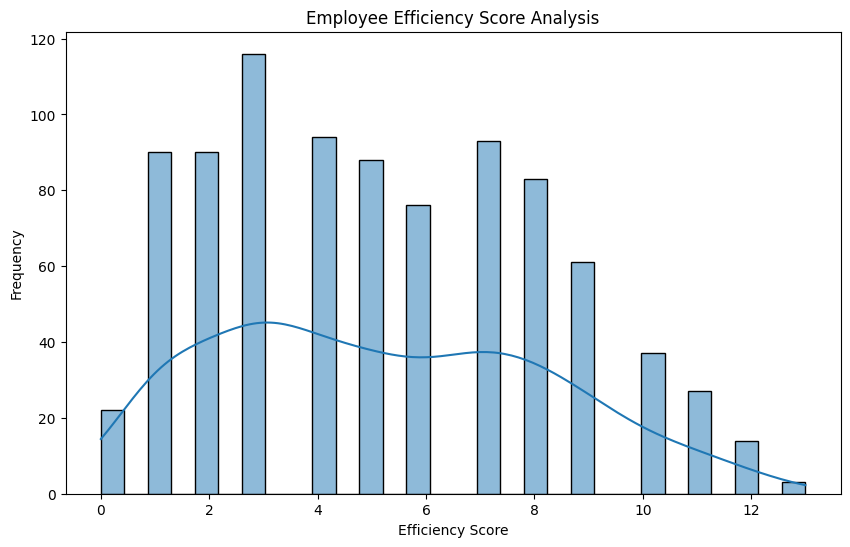

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data["Efficiency Score"], bins=30, kde=True)
plt.title("Employee Efficiency Score Analysis")
plt.xlabel("Efficiency Score")
plt.ylabel("Frequency")
plt.show()

This chart shows that majority of the employees have lower efficiency scores, and fewer employees achieved higher efficiency scores. The highest frequency occured around the 2 to 6 range, indicating that many employee fall within the lower efficlency score range.
Additionally, as efficiency scores increases past 6, the frequency decreases steadily, showing that high efficiency scores are less common.


*   Show a box plot for Monthly Hours across different departments to identify workload patterns



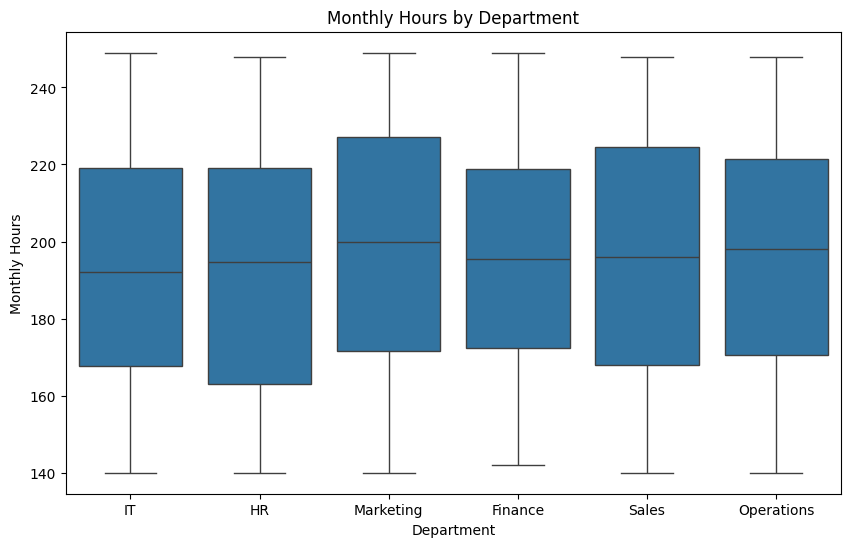

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Department", y="Monthly Hours", data=data)
plt.title("Monthly Hours by Department")
plt.xlabel("Department")
plt.ylabel("Monthly Hours")
plt.show()

This plot displays a *Monthly Hours by Department* analysis, Illustrating the distribution of monthly working hours accross the six departments, It is observed that the medians for all departments seems relatively close, hovering around the 200-hour mark, suggesting a similar average workload across departments. Furthermore, the plot does not show any significant outliers, which suggests that, there are no extreme variations in monthly hours within each department. This confirms the initial analysis that was carried to check Monthly Hours outliers

# Conclusions and Recommendations


*   Based on the analysis, provide insights and actionable recommendations for TechCorp

**Insights**



**Employee Satisfaction:** The average satistaction scores across departments reveal that Sales and Finance have the highest levels of employee satisfaction, while fT. HIR, Marketing, and Operations show moderate scores. This indicates that Sales and Finance likely have supportive environments, good rewards, wile other departments may need improvements.

**Workload Analysis:** The department-wise review shows that more employees are overworked in the Sales department than in any other. In comparison, IT has the fewest overworked staff, while Finance, HR, Marketing, and Operations have similar numbers. This pattern suggests that the Sales department may be dealing with a heavier workload or possibly has fewer resources, leading to higher stress for its employees.

**Efficiency Scores:** The average efficiency scores show that employees in Operations and Finance complete projects with fewer hours. suggesting better resource management or clearer workflows. Alternatively, Marketing and Sales have lower efficiency scores. For sales, this might be because of the workload, which indicates that these teams may need support or process improvements.

**Recommendations:**
**Targeted Employee Engagement Initiatives**

**Marketing and Operations:** Given the lower satisfaction scores in these departments, TechCorp can consider running focus groups or surveys to pinpoint specific employee concerns. The insights gathered can be used to implement targeted initiatives, such as better workload management, additional resources, or team-bullding activities, all aimed at boosting morale and increasing engagement.

**Sales and Finance:** To sustain the positive environment in these departments, conduct regular check-ins with employees and continue reinforcing the factors that drive their high satisfaction.

* Improve Efficiency in Underperforming Roles

**Marketing and Sales:** Implement training programs to help employees develop time management and productivity skills. Consider process optimization workshops or introducing tools that can streamline repetitive tasks.

**Operations and Finance:** Leverage best practices from these roles and explore how they can be applied in other departments. Recognize employees in these roles to encourage a culture of efficiency and productivity.



*   Suggest potential strategies for improving employee satisfaction and reducing overwork

**1.Implement Workload Management Strategies:**

**Redistribute Work:** Analyze the workload distribution within departments, particularly in Sales, to ensure that employees are not overwhelmed.
Consider hiring additional staff or redistributing responsibilities among team members to balance workloads effectively.

**Introduce Flexible Work Hours:** To alleviate the pressure on overworked employees, TechCorp could introduce flexible working hours or remote working options, allowing employees to manage their time better while maintaining productivity.

**2.Enhance Employee Engagement and Training:**

**Regular Satisfaction Surveys:** Conduct regular employee satisfaction surveys to gather feedback on workplace conditions and morale. This data can be used to Identity areas for improvement and address employee concerns promptly.

**Professional Development Programs:** Invest in training and development opportunities to enhance employee skills and job satisfaction.

By Implementing these strategies, TechCorp Inc, can foster a more balanced work environment, enhance employee satisfaction, and ultimately improve productivity across the organization,
